# Dog Breed Classifier with FastAi

In this project, we are provided with a training set and a test set of images of dogs. Each image has a filename that is its unique id. The dataset comprises 120 breeds of dogs. The goal is to create a classifier capable of determining a dog's breed from a photo. The dataset is obtained from https://www.kaggle.com/c/dog-breed-identification


## Setting up Google Colab to run the Notebook

In [1]:
 # to update fastai to the latest version
 !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
# to allow Colaboratory instance to read and write files to Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
print(base_dir)

/content/gdrive/My Drive/fastai-v3/


In [4]:
# Check python version
import sys
sys.version

'3.6.9 (default, Nov  7 2019, 10:44:02) \n[GCC 8.3.0]'

In [0]:
# to import fastai vision library
from fastai.vision import *

In [6]:
# to check if gpu is enabled
torch.cuda.is_available()

True

In [7]:
# to check if gpu is enabled
torch.backends.cudnn.enabled

True

In [8]:
# for checking GPU assigned and available RAM

# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print(gpu.name)
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=8b4c0074b2792414a529e75378e34aedbe90269f7139fdc8d257dd28ecc88230
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Tesla P4
Gen RAM Free: 12.7 GB  | Proc size: 315.8 MB
GPU RAM Free: 7601MB | Used: 10MB | Util   0% | Total 7611MB


## Viewing the Data

In [0]:
# pointing the path to the correct folder which contain the dataset
path = Path(base_dir + 'data/dog-breed-identification')

In [10]:
path

PosixPath('/content/gdrive/My Drive/fastai-v3/data/dog-breed-identification')

In [11]:
# reading the label dataset
df = pd.read_csv(path/'labels.csv')
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [0]:
tfms = get_transforms()

np.random.seed(42)

src = (ImageList.from_csv(path, 'labels.csv', folder='train', suffix='.jpg')
       .split_by_rand_pct(0.2)
       .label_from_df())

In [0]:
# creating databunch from the images
data = (src.transform(tfms, size=224)
        .databunch())

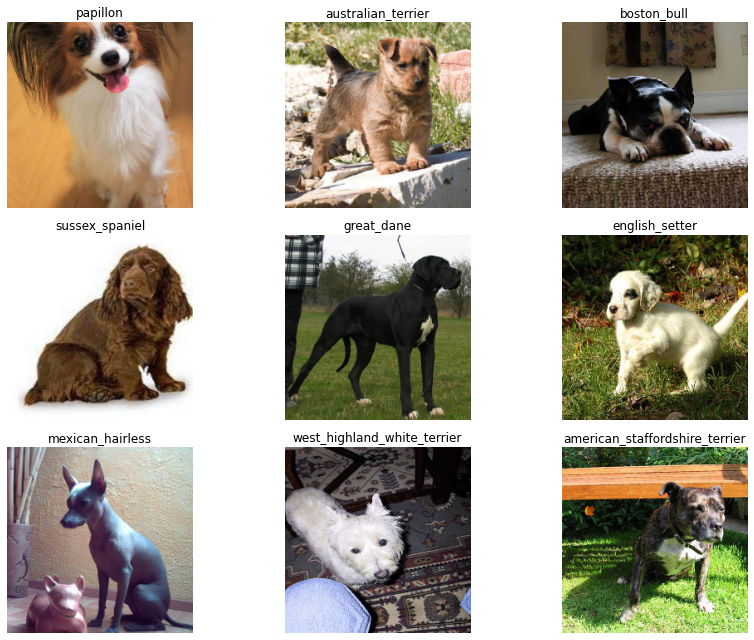

In [15]:
# showing some image examples
data.show_batch(rows=3, figsize=(12,9))

In [16]:
data.classes

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


In [17]:
data.c

120

In [18]:
len(data.train_ds), len(data.valid_ds)

(8178, 2044)

## Train model

In [19]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [20]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


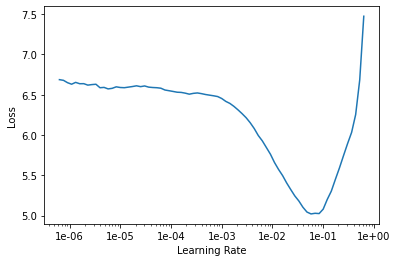

In [21]:
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(7, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.982136,0.947890,0.721135,15:16
1,1.950104,2.500478,0.462818,02:16
2,1.626522,1.218525,0.666341,02:15
3,1.208833,1.002948,0.712818,02:16
4,0.914629,0.731221,0.781311,02:16
5,0.674130,0.626134,0.805284,02:16
6,0.529716,0.596749,0.817025,02:17


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [25]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


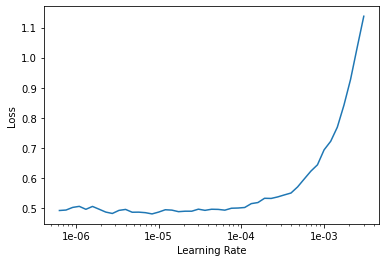

In [26]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [27]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.521585,0.597155,0.813601,02:19
1,0.483889,0.596749,0.813601,02:19


In [0]:
learn.save('stage-2')

## Interpretation

In [0]:
learn.load('stage-2');

In [31]:
interp = ClassificationInterpretation.from_learner(learn)

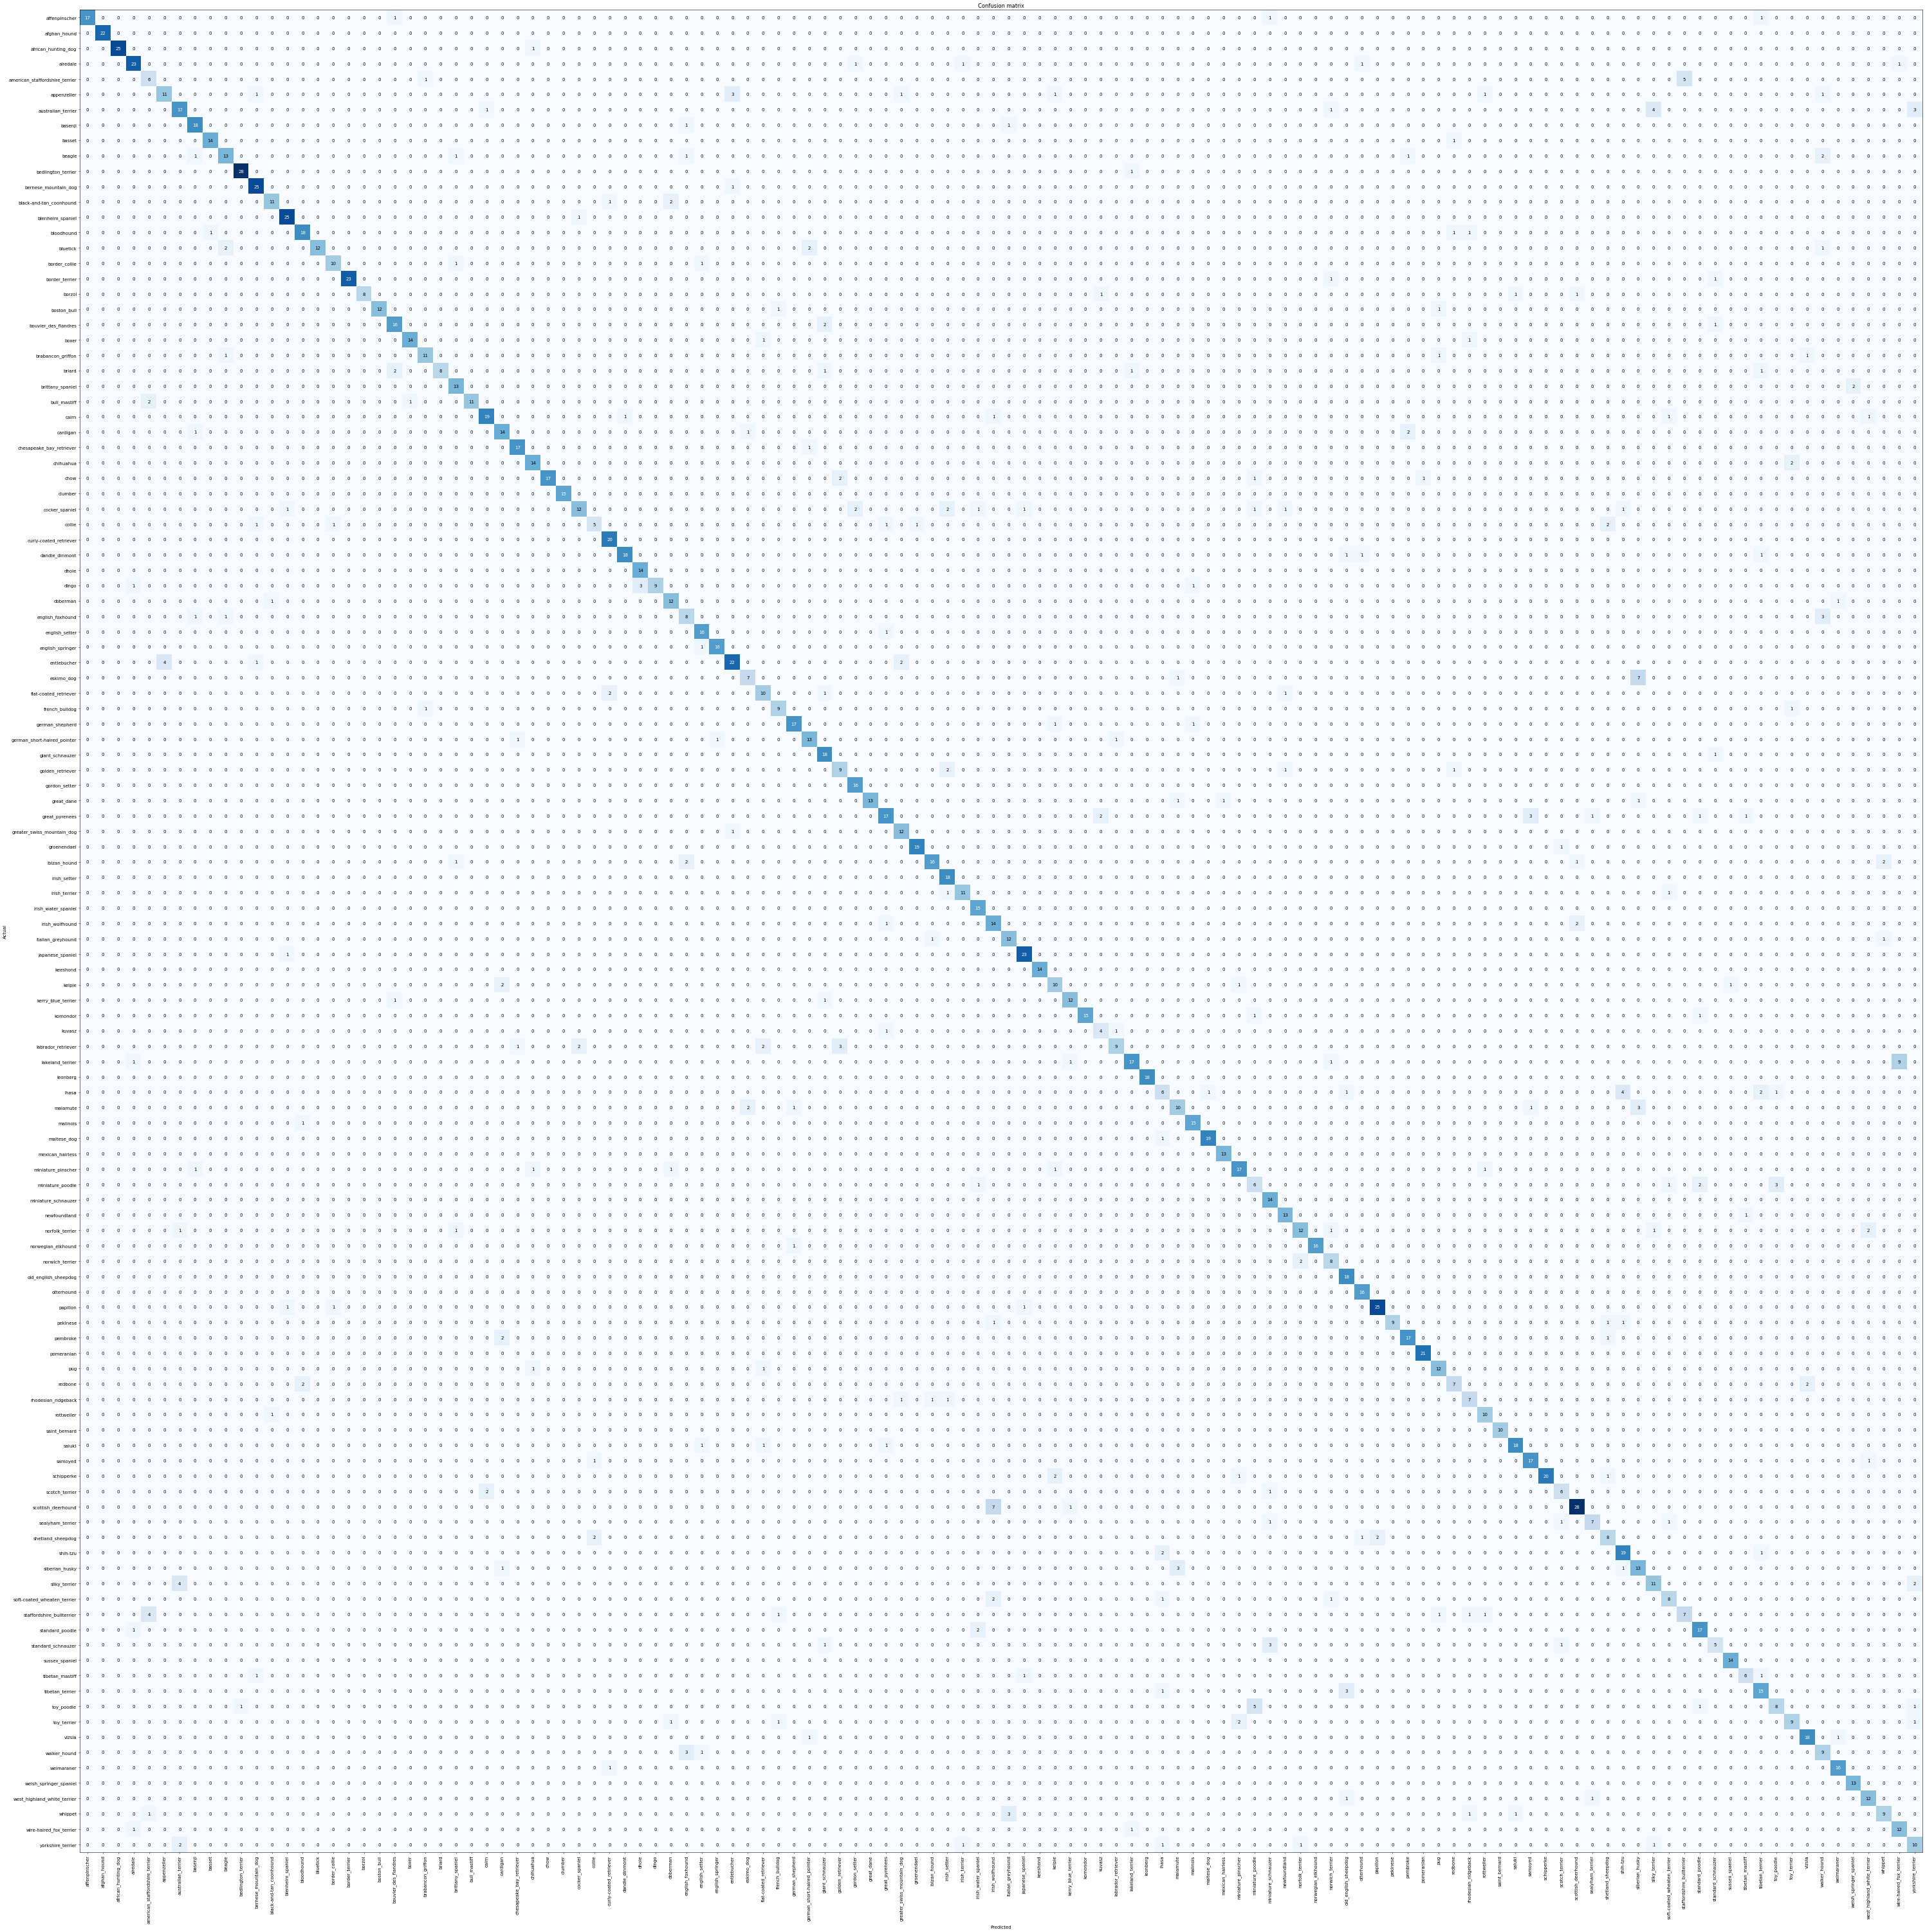

In [32]:
interp.plot_confusion_matrix(figsize=(60,60), dpi=50)

In [33]:
interp.most_confused(min_val=2)

[('lakeland_terrier', 'wire-haired_fox_terrier', 9),
 ('eskimo_dog', 'siberian_husky', 7),
 ('scottish_deerhound', 'irish_wolfhound', 7),
 ('american_staffordshire_terrier', 'staffordshire_bullterrier', 5),
 ('toy_poodle', 'miniature_poodle', 5),
 ('australian_terrier', 'silky_terrier', 4),
 ('entlebucher', 'appenzeller', 4),
 ('lhasa', 'shih-tzu', 4),
 ('silky_terrier', 'australian_terrier', 4),
 ('staffordshire_bullterrier', 'american_staffordshire_terrier', 4),
 ('appenzeller', 'entlebucher', 3),
 ('australian_terrier', 'yorkshire_terrier', 3),
 ('dingo', 'dhole', 3),
 ('english_foxhound', 'walker_hound', 3),
 ('great_pyrenees', 'samoyed', 3),
 ('labrador_retriever', 'golden_retriever', 3),
 ('malamute', 'siberian_husky', 3),
 ('miniature_poodle', 'toy_poodle', 3),
 ('siberian_husky', 'malamute', 3),
 ('standard_schnauzer', 'miniature_schnauzer', 3),
 ('tibetan_terrier', 'old_english_sheepdog', 3),
 ('walker_hound', 'english_foxhound', 3),
 ('whippet', 'italian_greyhound', 3),
 ('be

## Testing the Model with sample Image

In [0]:
# function to get image from URL
def fetch_image(url):
    response = requests.get(url)
    img = open_image(BytesIO(response.content))
    return img

In [0]:
# sample image URL
pomeranian = "https://i2.wp.com/res.cloudinary.com/kohepets/image/upload/v1527326485/Pomeranian_a8hmep.jpg?resize=697%2C465&ssl=1"

In [0]:
import pprint

# function to predict the image
def predict(url):
    img = fetch_image(url)
    pred_class,pred_idx,outputs = learn.predict(img)
    res =  zip (learn.data.classes, outputs.tolist())
    predictions = sorted(res, key=lambda x:x[1], reverse=True)
    top_predictions = predictions[0:5]
    pprint.pprint( top_predictions)
    return img.resize(500)

[('pomeranian', 0.9999392032623291),
 ('papillon', 3.358140020282008e-05),
 ('japanese_spaniel', 1.8908714991994202e-05),
 ('pekinese', 4.447618266567588e-06),
 ('keeshond', 1.8485999362383154e-06)]


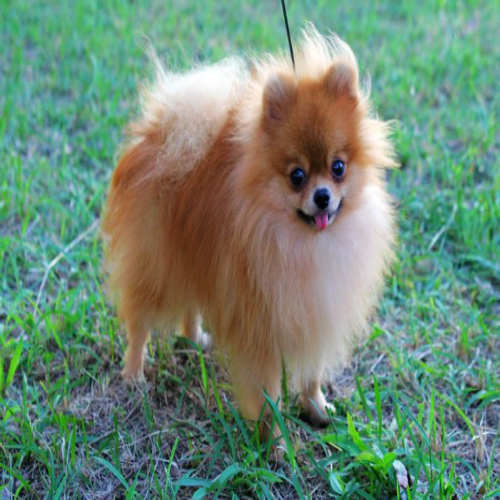

In [37]:
predict(pomeranian)

## Saving the model

To make the model available as a web app, we will need to save:

1.   final model
2.   list of class names

In [0]:
model_path = str(path)+"/models/"
model_name = "model_new.pkl"

In [0]:
# exporting the final model
learn.export(model_path + model_name)

In [0]:
# exporting the list of class name
with open(model_path + "classes.txt", 'w') as f:
    json.dump(learn.data.classes,f)